# California House Price Prediction
We have to predict the prices of houses in California \
I am going to use the Linear Regression Model in Supervised Machine Learning. 

## Import Libraries

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

**Have to Import CSV file**

In [105]:
df = pd.read_csv('C:/MLwP/Coursera/ML/ML with Python/Projects/California House Price/.data/housing.csv')

In [107]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


## Cleaning The File

In [114]:
print(df.isna().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


Filling the All Missing values with mean value of the Column

In [117]:
mean_value = df['total_bedrooms'].mean()
df['total_bedrooms']=df['total_bedrooms'].fillna(mean_value)

In [119]:
print(df.isna().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


## EDA
Let us visualize the data

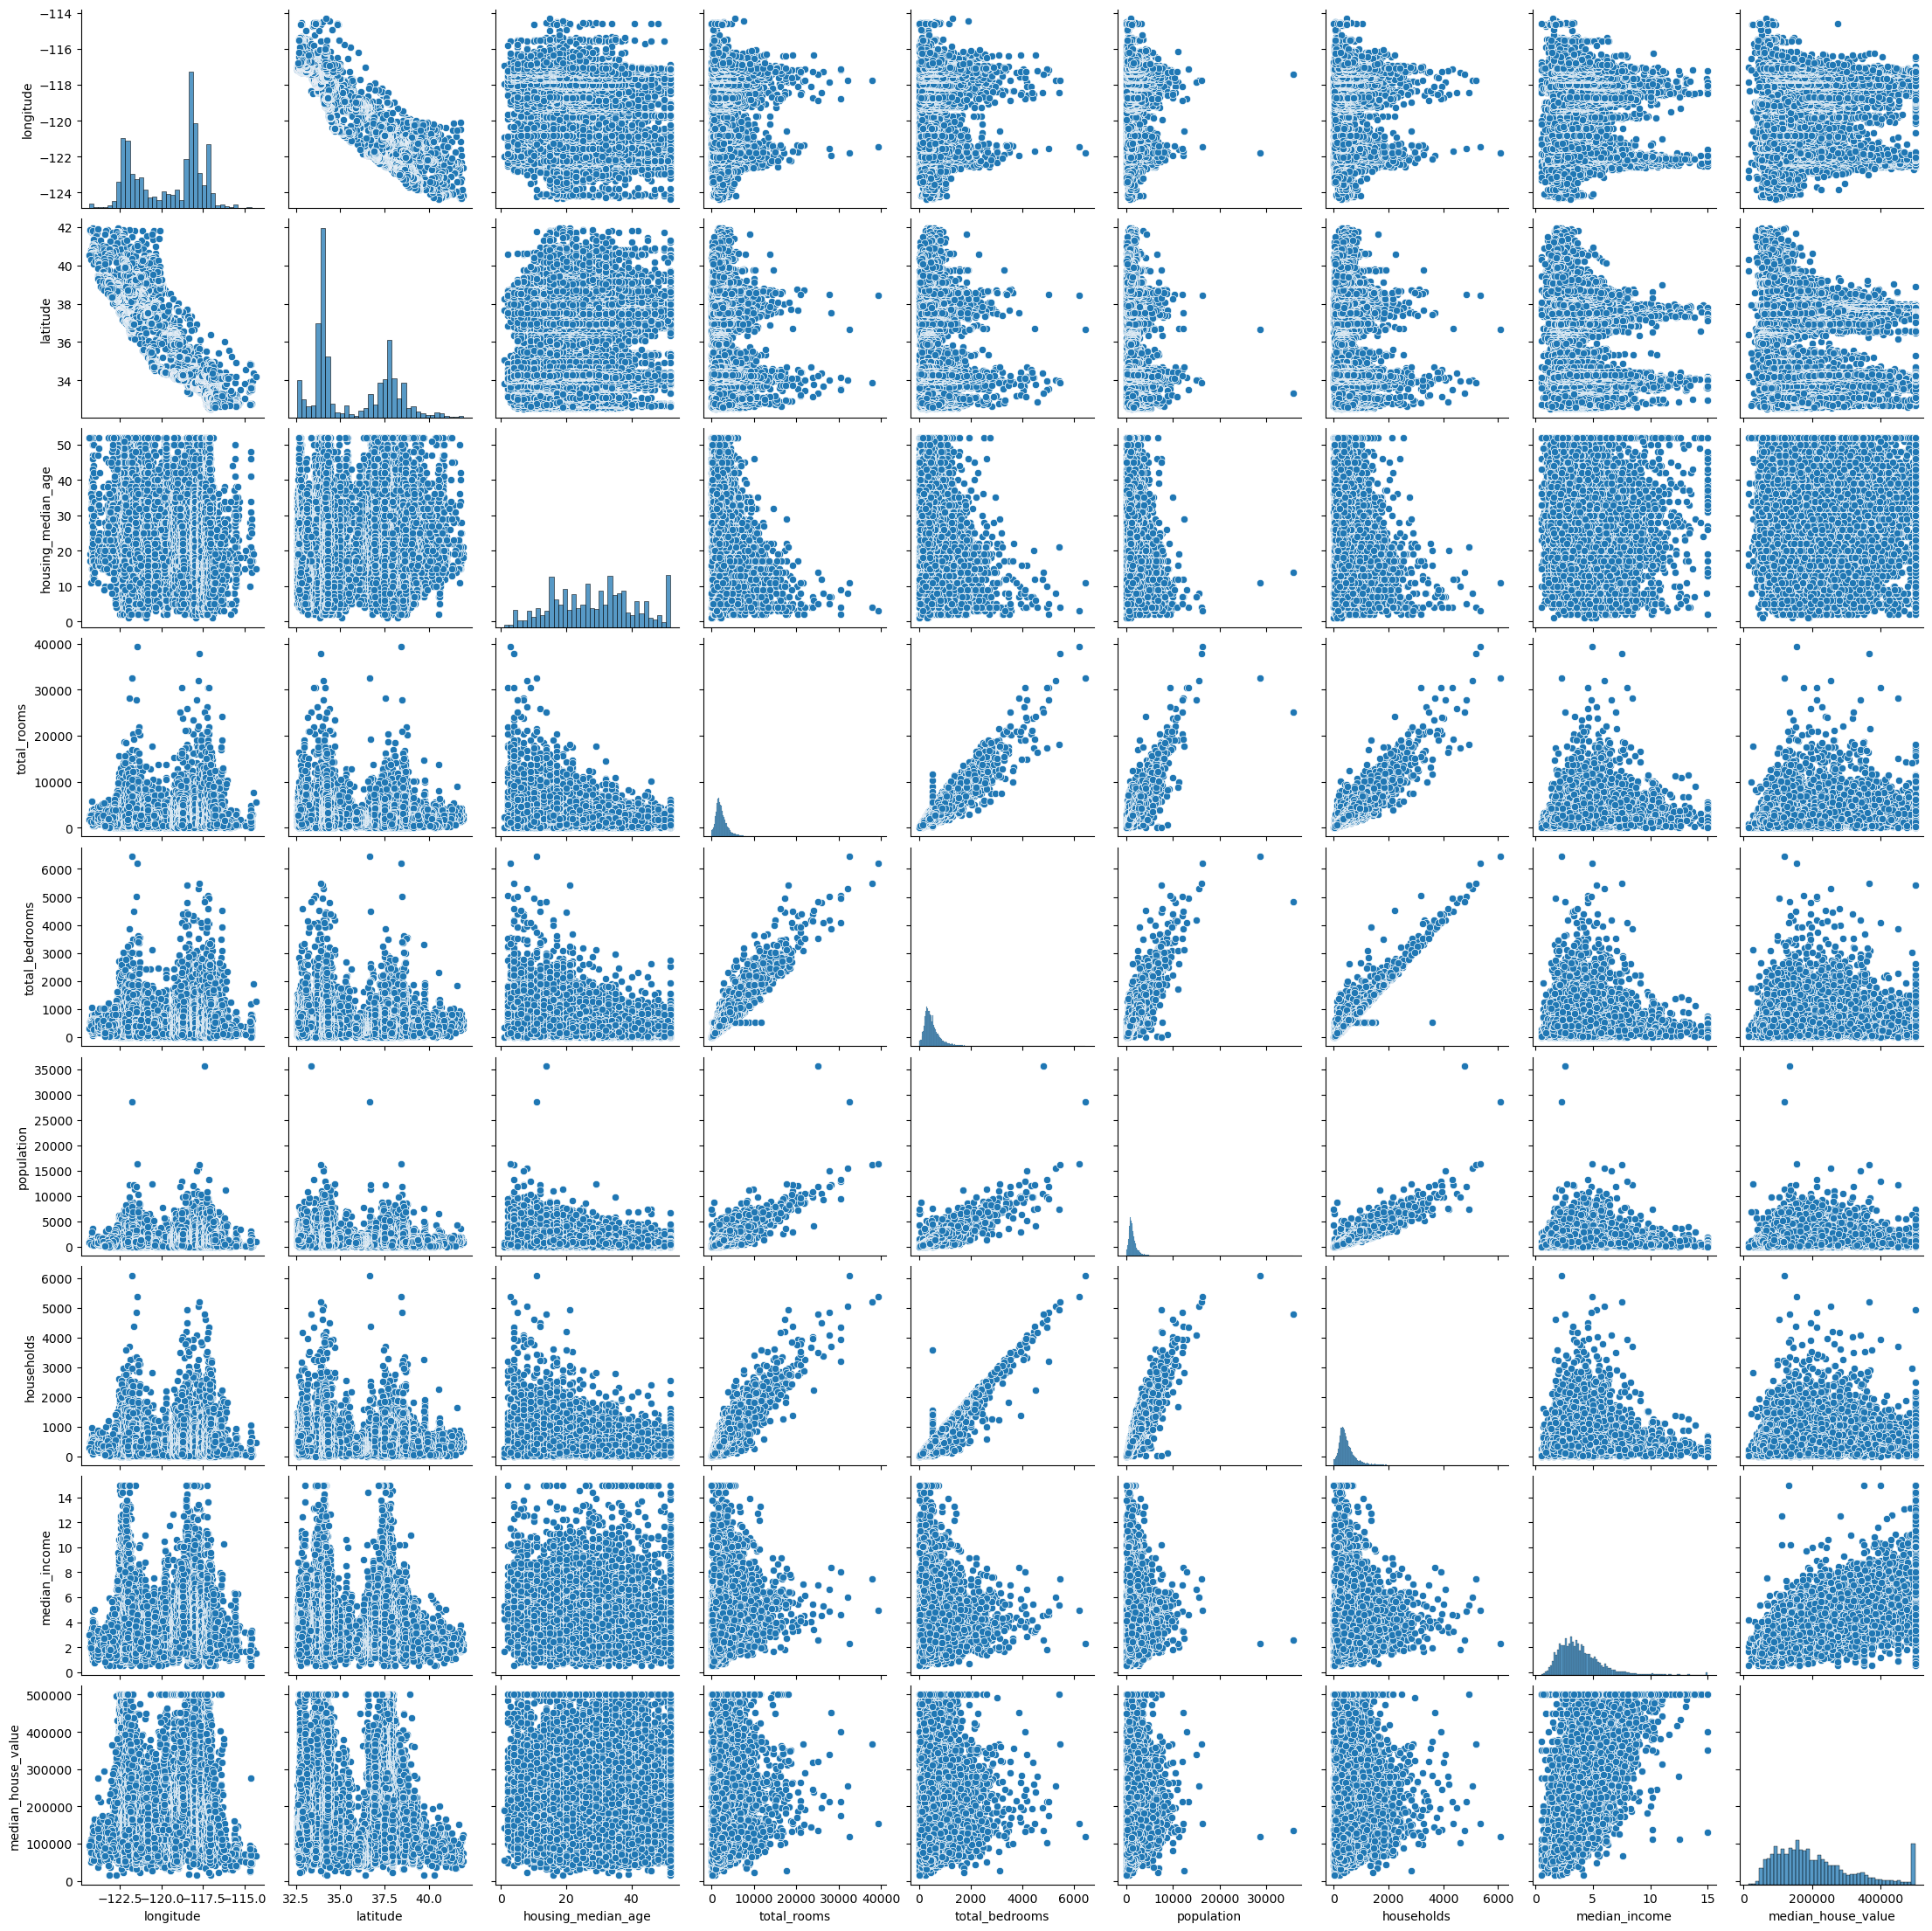

In [121]:
sns.pairplot(df,kind = "scatter")

<Axes: xlabel='median_income', ylabel='median_house_value'>

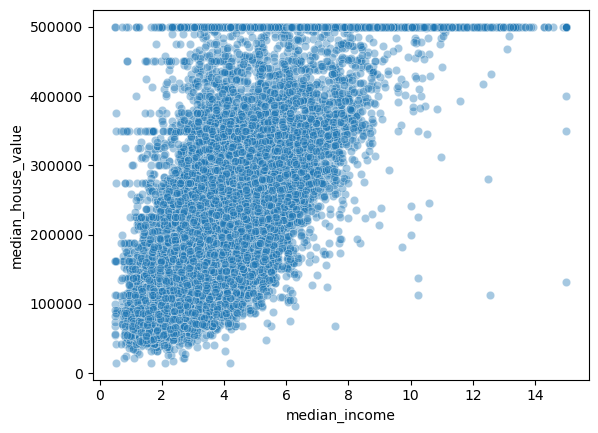

In [123]:
sns.scatterplot(x="median_income",y="median_house_value",data=df,alpha=0.4)

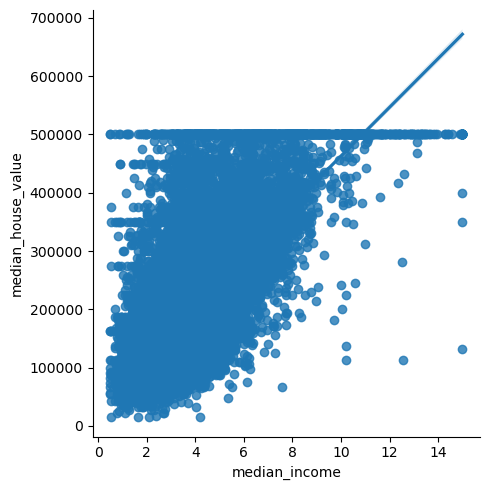

In [125]:
sns.lmplot(df,x="median_income",y="median_house_value")

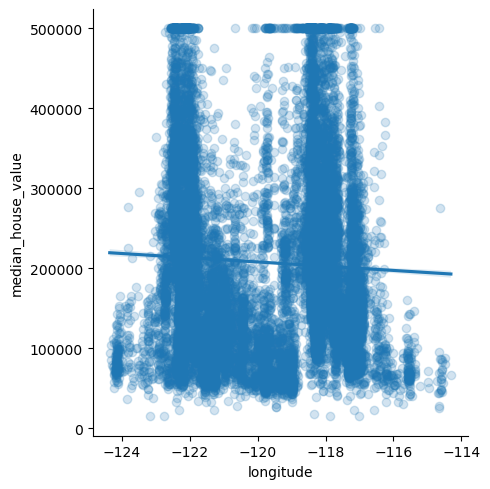

In [127]:
sns.lmplot(x="longitude",y="median_house_value",data=df,scatter_kws={'alpha':0.2})

## Train Test Split
dividing the data

In [129]:
X = df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households', 'median_income']]
y = df['median_house_value']

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state= 42)

In [133]:
X_test.shape

(6192, 8)

## Training The Model

In [135]:
model = LinearRegression()

In [137]:
model.fit(X_train,y_train)

LinearRegression()

In [139]:
predict = model.predict(X_test)

In [141]:
predict

array([ 76922.86397244, 166126.20673656, 262505.09153454, ...,
       283790.08706491, 128164.26276148, 213772.098847  ])

In [155]:
model.coef_

array([-4.26430157e+04, -4.23108503e+04,  1.18516310e+03, -8.05495391e+00,
        1.19513915e+02, -3.75647763e+01,  3.97022468e+01,  4.03610310e+04])

In [157]:
model.intercept_

-3583900.4648090983

In [145]:
print("mean_squared_error:", mean_squared_error(predict,y_test))

mean_squared_error: 4852059947.129145


In [147]:
print("R2 Score:", r2_score(predict,y_test))

R2 Score: 0.4238888525347402


In [149]:
residuals = predict - y_test

In [151]:
residuals

20046     29222.863972
3024     120326.206737
15663   -237495.908465
20484     56697.656151
9814       1186.512145
             ...      
17505    -20127.910155
13512     16722.216060
10842     65390.087065
16559      8764.262761
5786       3972.098847
Name: median_house_value, Length: 6192, dtype: float64

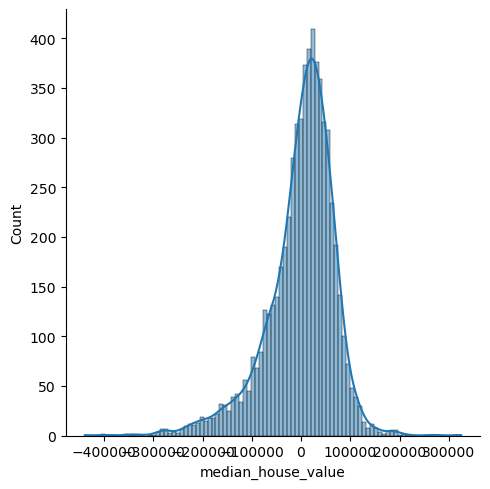

In [153]:
sns.displot(residuals, kde=True)

## Completed
Hence, we can predict the cost of any price in California Using Linear regression model. \
**Thota Rahul** \
rahulthota212gmail.com \
AM.EN.U4CSE22257 [Amrita Vishwa Vidyapeetham, Amritapuri Campus]